# Linear SVM vs Logistic Regression
*Clive Chan, 2017*

Apparently this question is asked a lot. Let's investigate it in detail.

## Training Data
Before we do anything, let's generate some simple data. Code derived from [this amazing set of plots](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

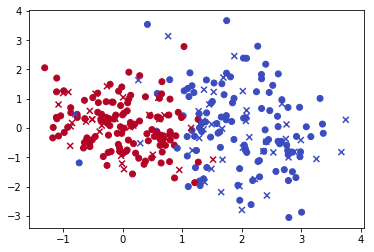

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

seed = 24601

X, y = make_classification(random_state=seed, n_samples=300, n_features=2,
                           n_informative=2, n_redundant=0, n_clusters_per_class=1)

rng = np.random.RandomState(seed)
X += 2 * rng.uniform(size=X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="coolwarm")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="coolwarm", marker="x")
plt.show()


## Linear SVM
Next, let's implement an SVM.
- First, we'll just use the sklearn implementation.
- We'll then implement a hard SVM using the [original paper](http://svms.org/training/BOGV92.pdf).
- Then we'll implement soft SVM using the [original paper](https://link.springer.com/content/pdf/10.1023%2FA%3A1022627411411.pdf).

These both are referenced from [this wonderful page](http://www.svms.org/history.html) on the history of SVMs.

### sklearn
`sklearn.svm.LinearSVC` conveniently provides such a model.

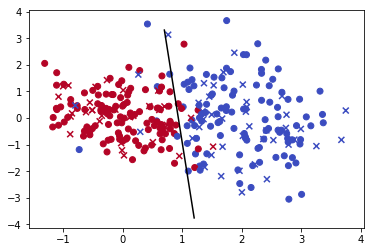

Training accuracy: 213/225 = 0.95
Testing accuracy: 70/75 = 0.93


In [77]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

# Derived from https://stackoverflow.com/a/22356267
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0.7, 1.2)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="coolwarm")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="coolwarm", marker="x")
plt.plot(xx, yy, 'k-')
plt.show()

train_count = np.count_nonzero(clf.predict(X_train) == y_train)
train_total = np.shape(X_train)[0]
test_count = np.count_nonzero(clf.predict(X_test) == y_test)
test_total = np.shape(X_test)[0]
print("Training accuracy: %d/%d = %.2f" % (train_count, train_total, train_count/train_total))
print("Testing accuracy: %d/%d = %.2f" % (test_count, test_total, test_count/test_total))


### The Math
Let's start by discussing the math behind SVMs.

$$


### The Implementation

Now let's write it in Python!

## Logistic Regression
...